# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [44]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from plotnine import *
from sklearn.preprocessing import PolynomialFeatures


penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


The variables that could be converted to dummy variables are sex, species, or island.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

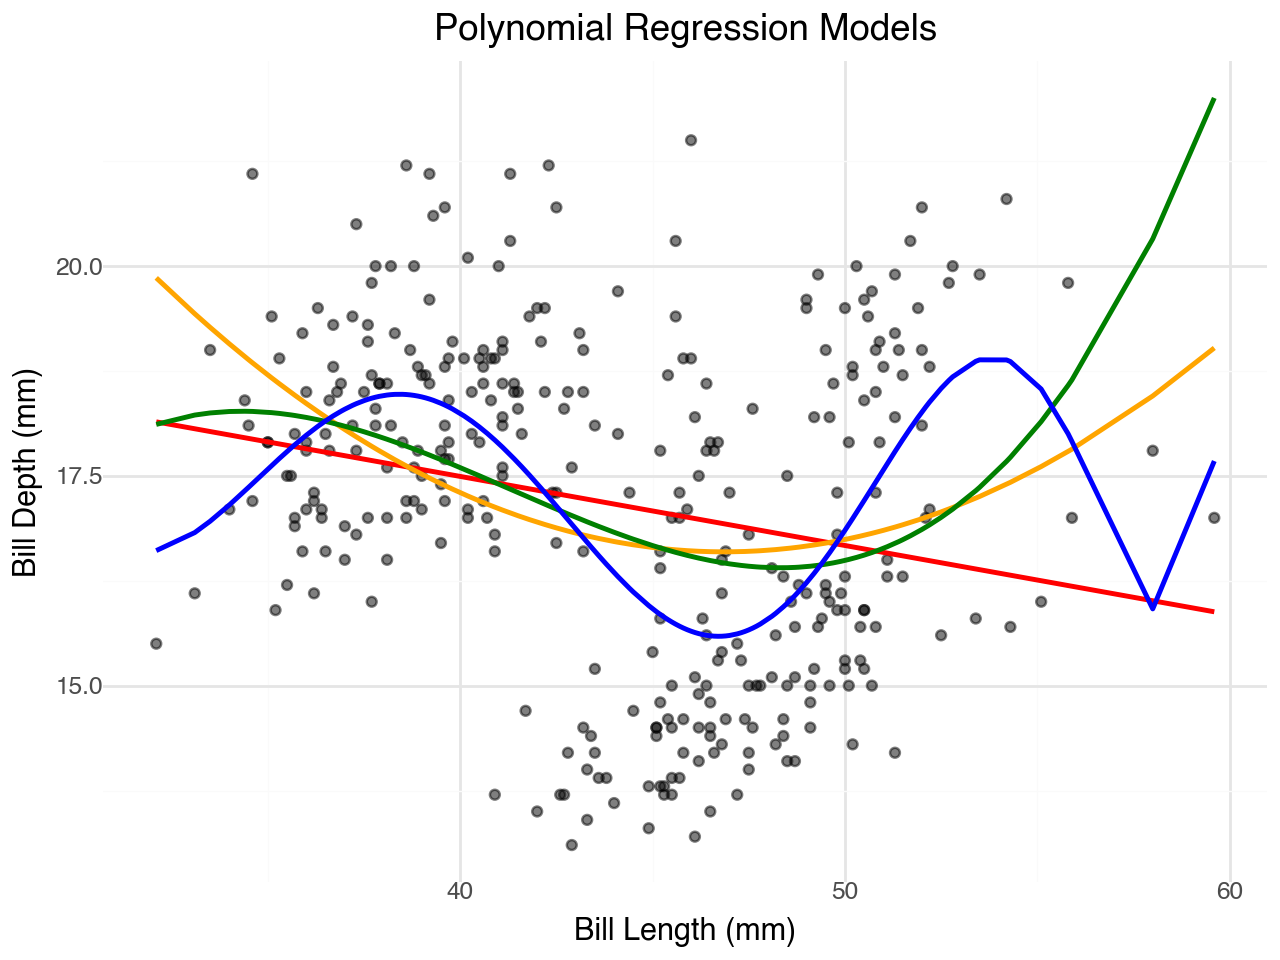

In [49]:
#drop missing values
penguins_encoded = penguins.dropna()

#predictor and response variables
X = penguins_encoded[['bill_length_mm']]
y = penguins_encoded['bill_depth_mm']

#create polynomial features
degrees = [1, 2, 3, 10]
predictions = {}

#create dataframe
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    #create polynomial features
    X_poly = poly.fit_transform(X)
    #linear regression revenue
    model = LinearRegression()
    #fit the polynomial model
    model.fit(X_poly, y)
    #store predictions
    predictions[degree] = model.predict(X_poly)

#prepare dataframe for plotting
plot_data = pd.DataFrame({
    'bill_length_mm': X['bill_length_mm'],
    'bill_depth_mm': y,
})

# add predictions to dataframe
for degree in degrees:
    plot_data[f'pred_degree_{degree}'] = predictions[degree]

#scatterplot
(ggplot(plot_data, aes(x='bill_length_mm')) +
     geom_point(aes(y='bill_depth_mm'), color='black', alpha=0.5) +  # Actual data points
     geom_line(aes(y='pred_degree_1'), color='red', size=1) +  # Degree 1
     geom_line(aes(y='pred_degree_2'), color='orange', size=1) +  # Degree 2
     geom_line(aes(y='pred_degree_3'), color='green', size=1) +  # Degree 3
     geom_line(aes(y='pred_degree_10'), color='blue', size=1) +  # Degree 10  
     labs(title='Polynomial Regression Models',
          x='Bill Length (mm)',
          y='Bill Depth (mm)') +
     theme_minimal()
)



* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The degree 10 model is overfitting the data 